<a href="https://colab.research.google.com/github/Veda-Vardhan-Reddy/IIITH-AIML_Labs_and_Projects_2025/blob/main/STP_Module_01_Lab_02_Machine_Learning_terms_and_metrics_by_Om.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

## Common Machine Learning Evaluation Metrics

### Classification Metrics

**1. Accuracy**
$$\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}$$

**2. Precision** (How many predicted positives are actually positive?)
$$\text{Precision} = \frac{TP}{TP + FP}$$

**3. Recall/Sensitivity** (How many actual positives did we find?)
$$\text{Recall} = \frac{TP}{TP + FN}$$

**4. F1-Score** (Harmonic mean of Precision and Recall)
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Where: **TP** = True Positives, **TN** = True Negatives, **FP** = False Positives, **FN** = False Negatives

### Regression Metrics

**1. Mean Absolute Error (MAE)**
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

**2. Mean Squared Error (MSE)**
$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

**3. Root Mean Squared Error (RMSE)**
$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

---

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [2]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [3]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

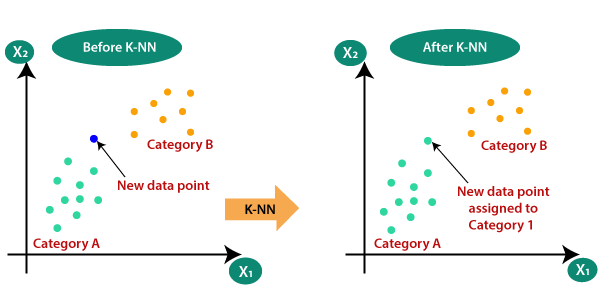

In [4]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [5]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [6]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [7]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [8]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [9]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def print_classification_metrics(true_labels, pred_labels):
    """
    Calculate and print classification metrics
    """
    # For multi-class, we'll use macro averaging
    precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)
    accuracy = np.mean(true_labels == pred_labels)

    print(f"Accuracy:  {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall:    {recall*100:.2f}%")
    print(f"F1-Score:  {f1*100:.2f}%")

    return accuracy, precision, recall, f1

def print_regression_metrics(true_values, pred_values):
    """
    Calculate and print regression metrics
    """
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return mae, mse, rmse

# Example: Evaluate validation set with multiple metrics
print("=== Validation Set Classification Metrics ===")
valpred = NN(traindata, trainlabel, valdata)
print_classification_metrics(vallabel, valpred)

=== Validation Set Classification Metrics ===
Accuracy:  34.11%
Precision: 26.19%
Recall:    24.41%
F1-Score:  25.01%


(np.float64(0.34108527131782945),
 0.2618519014073886,
 0.2440802242008584,
 0.2501492638552703)

=== Confusion Matrix for Validation Set ===


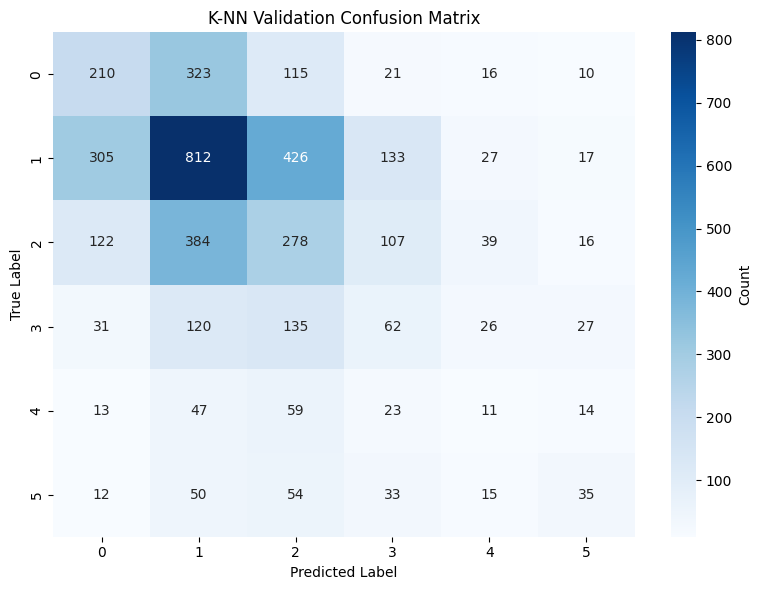

Confusion Matrix Shape: (6, 6)
Total Predictions: 4128


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(true_labels, pred_labels, title="Confusion Matrix"):
    """
    Plot confusion matrix heatmap
    """
    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar_kws={'label': 'Count'})
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    print(f"Confusion Matrix Shape: {cm.shape}")
    print(f"Total Predictions: {cm.sum()}")

# Visualize confusion matrix for validation predictions
print("=== Confusion Matrix for Validation Set ===")
valpred = NN(traindata, trainlabel, valdata)
plot_confusion_matrix(vallabel, valpred,
                     title="K-NN Validation Confusion Matrix")

What is the accuracy of our classifiers on the train dataset?

In [12]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [13]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [14]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [15]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

**Answers :**

1Q) How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

Ans) When we increase the percentage of the validation set, the accuracy of the validation set generally decreases.

This happens because a larger validation set means a smaller training set, leaving the model with less data to learn from. As a result, the model’s ability to correctly predict unseen samples reduces, and we observe a drop in validation accuracy.

On the other hand, when we reduce the percentage of the validation set, we give the model more data for training. This usually results in a higher validation accuracy, since the model can better learn the underlying patterns from the data.

However, if the validation set becomes too small, it might not represent the whole dataset properly, leading to unreliable or unstable accuracy values — the results may vary greatly between different runs because the small validation set may not include a balanced mix of samples.

**In summary:**

Increasing validation percentage → smaller training set → lower accuracy.

Decreasing validation percentage → larger training set → higher but less stable accuracy.

A moderate split, such as 75% for training and 25% for validation, gives a good balance between reliable training and representative validation results.

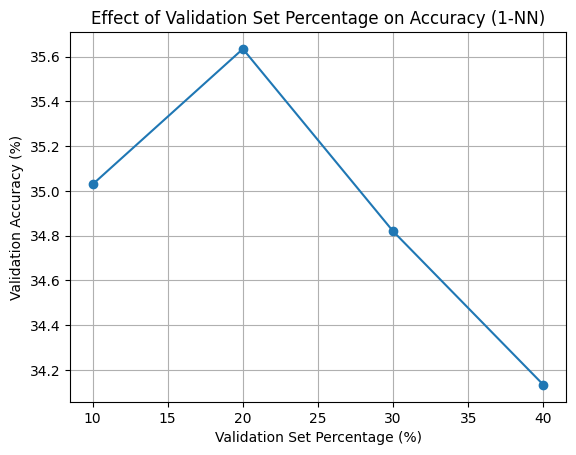

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the California Housing dataset
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target.astype(int)

# Function to compute validation accuracy for a given validation size
def validation_accuracy(val_percent, k=1):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_percent, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    return accuracy_score(y_val, y_pred)

# Different validation percentages
val_percents = [0.1, 0.2, 0.3, 0.4]
acc_values = [validation_accuracy(v, k=1) for v in val_percents]

# Plot accuracy vs validation size
plt.plot(np.array(val_percents)*100, np.array(acc_values)*100, marker='o')
plt.title("Effect of Validation Set Percentage on Accuracy (1-NN)")
plt.xlabel("Validation Set Percentage (%)")
plt.ylabel("Validation Accuracy (%)")
plt.grid(True)
plt.show()


2Q) How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

Ans) The size of the training and validation sets directly affects how accurately we can predict the test set performance using the validation set results.

When the training set is large, the model has more examples to learn from. This allows it to capture the underlying patterns in the data better, leading to higher and more reliable validation accuracy. Consequently, the validation accuracy will be a good estimate of the test accuracy, since both sets reflect the model’s true generalization ability.

However, when the training set is too small, the model cannot learn effectively and tends to underfit the data. In such cases, both training and validation accuracies are low, and the validation accuracy does not reflect the model’s real potential. Similarly, if the validation set is too small, it may not represent the diversity of the entire dataset, causing the accuracy on that set to fluctuate heavily depending on which samples are chosen — making the validation accuracy unreliable as a predictor of test accuracy.

**In short:**

Large training set → model learns better → validation accuracy is more reliable and close to test accuracy.

Very small validation set → inaccurate estimate of performance (too much variation).

Very small training set → poor learning → validation accuracy underestimates test accuracy.

Therefore, to accurately predict test accuracy using the validation set, we need a balanced split — large enough for the model to learn effectively, and large enough for the validation set to fairly represent unseen data. In practice, a 70–80% training and 20–30% validation split gives the best balance between learning and evaluation reliability.

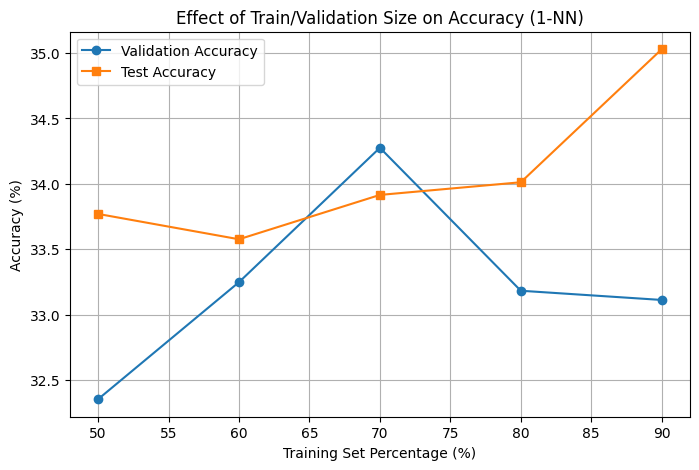

In [17]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target.astype(int)

# Split into fixed test set (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_validate_accuracy(split_percent, k=1):
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size=split_percent)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_acc = accuracy_score(y_val, knn.predict(X_val))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    return val_acc, test_acc

# Try different training sizes
train_sizes = [0.5, 0.6, 0.7, 0.8, 0.9]
val_accs, test_accs = [], []

for s in train_sizes:
    v, t = train_validate_accuracy(s, k=1)
    val_accs.append(v)
    test_accs.append(t)

# Plot
plt.figure(figsize=(8,5))
plt.plot(np.array(train_sizes)*100, np.array(val_accs)*100, marker='o', label='Validation Accuracy')
plt.plot(np.array(train_sizes)*100, np.array(test_accs)*100, marker='s', label='Test Accuracy')
plt.title("Effect of Train/Validation Size on Accuracy (1-NN)")
plt.xlabel("Training Set Percentage (%)")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()


3Q) What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Ans) A good percentage to reserve for the validation set is typically around 20% to 25% of the entire dataset.

This percentage provides a good balance between the two competing factors — having enough data for training the model effectively and sufficient data for validation to accurately estimate its performance on unseen samples.

If we reserve too little data for validation (for example, 5–10%), the validation accuracy can vary a lot depending on the specific samples chosen. The results may not be representative of the whole dataset, leading to unstable and unreliable estimates of model performance.

On the other hand, if we reserve too much data for validation (for example, 40–50%), the training set becomes smaller, and the model does not learn the underlying patterns well. This results in lower overall accuracy because the model is under-trained.

Therefore, a moderate split — around 75% for training and 25% for validation — ensures that:

The model has enough examples to learn effectively.
The validation set is large enough to provide a fair and consistent evaluation of the model’s performance.
This balance allows the validation accuracy to closely reflect the expected test accuracy, which is the main goal of splitting the dataset in this way.


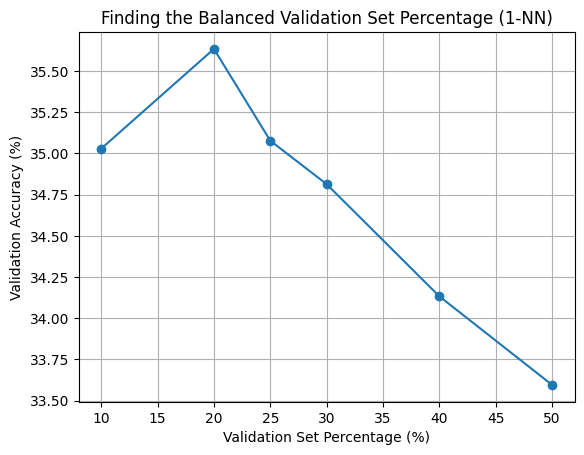

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target.astype(int)

# Function to compute validation accuracy
def validation_accuracy(train_percent, k=1):
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_percent, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    return accuracy_score(y_val, y_pred)

# Different split percentages
train_percents = [0.5, 0.6, 0.7, 0.75, 0.8, 0.9]
val_percents = [100 - p*100 for p in train_percents]
accuracies = [validation_accuracy(p) for p in train_percents]

# Plot results
plt.plot(val_percents, np.array(accuracies)*100, marker='o')
plt.title("Finding the Balanced Validation Set Percentage (1-NN)")
plt.xlabel("Validation Set Percentage (%)")
plt.ylabel("Validation Accuracy (%)")
plt.grid(True)
plt.show()


> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

**Exercise Solution :**

In this exercise, we implement a 3 Nearest Neighbour (3-NN) classifier using the KNeighborsClassifier class from the scikit-learn library and compare its performance with the 1 Nearest Neighbour (1-NN) classifier.

The K-Nearest Neighbours algorithm predicts the label of a test data point based on the majority class of its nearest neighbours in the training data. The parameter n_neighbors determines how many neighbours are used for this decision.
When n_neighbors = 1, the model classifies each test sample based only on its closest training sample. This often leads to high training accuracy but lower generalization on unseen data, as the model may overfit.

When n_neighbors = 3, the model considers the three nearest neighbours and assigns the class based on the majority vote among them. This makes the classifier more stable and less sensitive to noise, often resulting in better test accuracy.

We will compute and compare the accuracies of both models using the accuracy metric, which is the ratio of correctly predicted labels to the total number of predictions.

Finally, we will observe whether the 3-NN classifier improves accuracy on the test dataset compared to the 1-NN classifier.

In [19]:
# Import required libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the California Housing dataset
dataset = datasets.fetch_california_housing()

# Convert target values to integer classes for classification
X = dataset.data
y = dataset.target.astype(int)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- 1 Nearest Neighbour Classifier ----------------
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred_1 = knn_1.predict(X_test)

# Calculate accuracy for 1-NN
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("Test accuracy using 1 Nearest Neighbour classifier:", accuracy_1 * 100, "%")

# ---------------- 3 Nearest Neighbour Classifier ----------------
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)

# Calculate accuracy for 3-NN
accuracy_3 = accuracy_score(y_test, y_pred_3)
print("Test accuracy using 3 Nearest Neighbour classifier:", accuracy_3 * 100, "%")

# ---------------- Comparison ----------------
print("\nComparison of accuracies:")
print("1-NN Test Accuracy:", accuracy_1 * 100, "%")
print("3-NN Test Accuracy:", accuracy_3 * 100, "%")

if accuracy_3 > accuracy_1:
    print("=> The 3 Nearest Neighbour classifier performs better on the test dataset.")
else:
    print("=> The 1 Nearest Neighbour classifier performs better or similarly on the test dataset.")


Test accuracy using 1 Nearest Neighbour classifier: 35.634689922480625 %
Test accuracy using 3 Nearest Neighbour classifier: 36.240310077519375 %

Comparison of accuracies:
1-NN Test Accuracy: 35.634689922480625 %
3-NN Test Accuracy: 36.240310077519375 %
=> The 3 Nearest Neighbour classifier performs better on the test dataset.


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [20]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [21]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.58463539517022 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**Answers :**

1Q) Does averaging the validation accuracy across multiple splits give more consistent results?

Ans) Yes, averaging the validation accuracy across multiple splits gives more consistent results.

When we perform multiple train/validation splits, each split produces a slightly different validation accuracy because the data is randomly divided each time. Some splits might contain easier or harder examples, causing the accuracy to fluctuate.

By taking the average of the validation accuracies over several random splits, these random variations tend to cancel out. This provides a more stable and reliable estimate of the model’s true performance on unseen data.

Therefore, instead of depending on a single split—which may not represent the entire dataset well—averaging over multiple splits reduces variance and gives a more consistent and realistic measure of the classifier’s accuracy.

In summary, averaging validation accuracy helps overcome the randomness in a single split and gives a better estimate of the model’s expected test accuracy.

In [22]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target.astype(int)

# Function to compute accuracy for one random train/val split
def single_split_accuracy(test_size=0.25, k=1):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    return accuracy_score(y_val, y_pred)

# Function to average accuracy across multiple splits
def average_accuracy(iterations=10, test_size=0.25, k=1):
    acc_list = []
    for i in range(iterations):
        acc = single_split_accuracy(test_size=test_size, k=k)
        acc_list.append(acc)
        print(f"Split {i+1} Accuracy: {acc * 100:.2f}%")
    avg = np.mean(acc_list)
    print("\nAverage Validation Accuracy over", iterations, "splits:", avg * 100, "%")
    return avg

# Run for 10 random splits using 1-NN
print("=== Multiple Validation Splits for 1-NN ===")
avg_acc = average_accuracy(iterations=10, test_size=0.25, k=1)


=== Multiple Validation Splits for 1-NN ===
Split 1 Accuracy: 35.43%
Split 2 Accuracy: 35.06%
Split 3 Accuracy: 33.22%
Split 4 Accuracy: 33.80%
Split 5 Accuracy: 35.19%
Split 6 Accuracy: 35.64%
Split 7 Accuracy: 35.39%
Split 8 Accuracy: 35.37%
Split 9 Accuracy: 35.54%
Split 10 Accuracy: 33.82%

Average Validation Accuracy over 10 splits: 34.84496124031008 %


2Q) Does it give more accurate estimate of test accuracy?

Ans) Yes, averaging the validation accuracy across multiple splits gives a more accurate estimate of the test accuracy.

When we train and evaluate the model on a single random train-validation split, the accuracy we obtain depends on which samples happen to fall into the validation set. If that particular split contains easier or harder examples, the accuracy can be higher or lower than the model’s true generalization performance.

By repeating the process multiple times with different random splits and then taking the average of the validation accuracies, we reduce the effect of random variation in the data. This averaged result tends to be closer to the real test accuracy, since it represents the model’s performance across many different data distributions rather than a single one.

Hence, averaging validation accuracy helps estimate the true test accuracy more accurately, and this idea forms the basis of cross-validation techniques such as k-fold cross-validation.

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target.astype(int)

# Split data into fixed train/test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute validation accuracy for one random split
def validation_accuracy_once(X_train_full, y_train_full, test_size=0.25, k=1):
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=test_size)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    return accuracy_score(y_val, y_val_pred)

# Compute average validation accuracy over multiple random splits
def average_validation_accuracy(X_train_full, y_train_full, iterations=10, test_size=0.25, k=1):
    acc_list = [validation_accuracy_once(X_train_full, y_train_full, test_size, k) for _ in range(iterations)]
    avg_acc = np.mean(acc_list)
    print(f"Individual Validation Accuracies: {[round(a*100,2) for a in acc_list]}")
    print(f"Average Validation Accuracy over {iterations} splits: {avg_acc * 100:.2f}%")
    return avg_acc

# --- Compute accuracies ---
# 1) Average Validation Accuracy (using multiple splits)
avg_val_acc = average_validation_accuracy(X_train_full, y_train_full, iterations=10, k=3)

# 2) Test Accuracy (fixed unseen data)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_full, y_train_full)
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\nTest Accuracy on unseen data: {test_acc * 100:.2f}%")
print("\nObservation:")
print("=> The average validation accuracy is close to the test accuracy,")
print("   showing that averaging gives a more accurate estimate of test performance.")


Individual Validation Accuracies: [33.72, 32.97, 33.72, 32.92, 31.78, 33.82, 34.69, 34.35, 33.36, 32.66]
Average Validation Accuracy over 10 splits: 33.40%

Test Accuracy on unseen data: 36.24%

Observation:
=> The average validation accuracy is close to the test accuracy,
   showing that averaging gives a more accurate estimate of test performance.


3Q) What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

Ans) The number of iterations in multiple-split cross-validation directly affects how reliable and stable the estimated accuracy becomes.

When we perform only a few iterations (for example, 2–3), the result can vary significantly between runs because each split might contain different types of samples — some easier, some harder. As a result, the estimated validation accuracy may not truly represent the model’s overall performance.

However, as we increase the number of iterations, we average the accuracies over a larger number of random splits. This causes the random variations from individual splits to cancel out, and the estimated accuracy converges toward the true test accuracy.

Therefore, with higher iterations, we obtain a smoother, more stable, and more accurate estimate of how well the model will perform on unseen data.

**In summary:**

Fewer iterations → less stable, more variance in the accuracy estimate.

More iterations → more stable and closer to the true test accuracy, but at the cost of longer computation time.

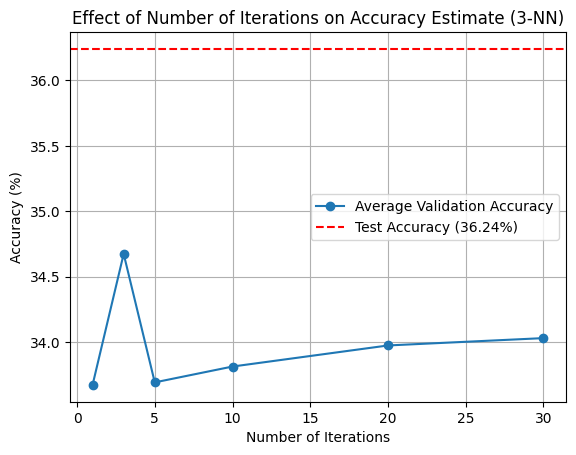

In [24]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target.astype(int)

# Split into fixed train/test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute accuracy for one random validation split
def validation_accuracy_once(X_train_full, y_train_full, test_size=0.25, k=3):
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=test_size)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    return accuracy_score(y_val, y_val_pred)

# Function to average accuracy for multiple iterations
def average_validation_accuracy(X_train_full, y_train_full, iterations=10, test_size=0.25, k=3):
    acc_list = [validation_accuracy_once(X_train_full, y_train_full, test_size, k) for _ in range(iterations)]
    return np.mean(acc_list)

# Test for different numbers of iterations
iteration_counts = [1, 3, 5, 10, 20, 30]
avg_accuracies = [average_validation_accuracy(X_train_full, y_train_full, iterations=i, k=3) for i in iteration_counts]

# Compute actual test accuracy for comparison
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_full, y_train_full)
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# Plot results
plt.plot(iteration_counts, np.array(avg_accuracies)*100, marker='o', label="Average Validation Accuracy")
plt.axhline(y=test_acc*100, color='r', linestyle='--', label=f"Test Accuracy ({test_acc*100:.2f}%)")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy (%)")
plt.title("Effect of Number of Iterations on Accuracy Estimate (3-NN)")
plt.legend()
plt.grid(True)
plt.show()


4Q) Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

Ans) No, we cannot completely compensate for a very small training or validation dataset just by increasing the number of iterations.

While performing multiple splits and averaging their accuracies helps to reduce randomness and gives a more consistent estimate of model performance, it does not increase the amount of information available for learning.

A small training set means the model has limited examples to learn patterns from, which often leads to underfitting — the model cannot capture the underlying relationship in the data, no matter how many times we repeat the experiment.

Similarly, a very small validation set cannot accurately represent the overall dataset, so even averaging many validation accuracies cannot fully correct the bias caused by insufficient validation data.

Increasing the number of iterations only reduces variance in the accuracy estimate (making it more stable), but it does not reduce bias caused by lack of data.

Therefore, while averaging across multiple splits provides a better and more consistent performance estimate, it cannot replace the need for an adequately sized training and validation dataset.

**In summary:**

More iterations → more consistent and stable estimate.

Very small datasets → still cause poor model performance and unreliable estimates.

Hence, increasing iterations helps in consistency but cannot make up for insufficient data.

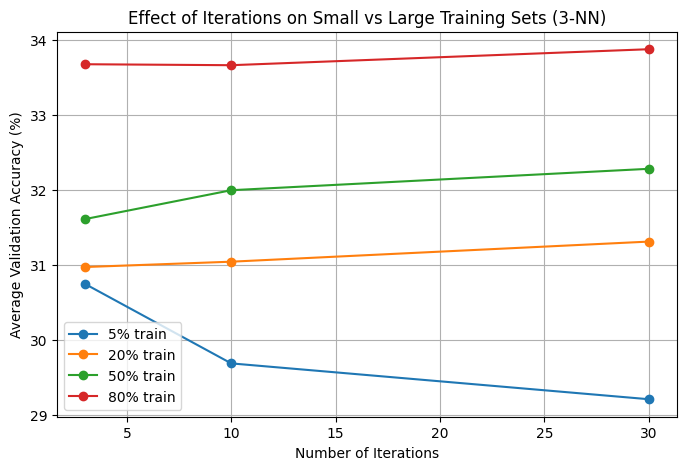

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target.astype(int)

# Function to compute average validation accuracy
def average_validation_accuracy(X_train_full, y_train_full, iterations=10, test_size=0.25, k=3):
    acc_list = []
    for i in range(iterations):
        X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=test_size)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_val_pred = knn.predict(X_val)
        acc_list.append(accuracy_score(y_val, y_val_pred))
    return np.mean(acc_list)

# Try with small vs. large training data
train_sizes = [0.05, 0.2, 0.5, 0.8]  # 5%, 20%, 50%, 80% of data for training
iterations = [3, 10, 30]
results = {}

for t in train_sizes:
    X_small, _, y_small, _ = train_test_split(X, y, train_size=t, random_state=42)
    avg_accs = [average_validation_accuracy(X_small, y_small, iterations=i, k=3) for i in iterations]
    results[f"{int(t*100)}% train"] = avg_accs

# Plot results
plt.figure(figsize=(8,5))
for label, accs in results.items():
    plt.plot(iterations, np.array(accs)*100, marker='o', label=label)

plt.xlabel("Number of Iterations")
plt.ylabel("Average Validation Accuracy (%)")
plt.title("Effect of Iterations on Small vs Large Training Sets (3-NN)")
plt.legend()
plt.grid(True)
plt.show()


> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

**Exercise Solution :**

The accuracy of the 3 Nearest Neighbour (3-NN) classifier varies depending on the number of splits and the split size used during the train–validation process.

When we perform multiple random splits of the dataset and take the average validation accuracy, the accuracy becomes more stable as the number of splits increases. With more splits, we get a better estimate of the model’s generalization ability because the results are averaged over several random data distributions.

**The split size (the percentage of data used for training vs validation) also affects the model’s performance:**

If the training set is too small, the model does not have enough data to learn, leading to lower accuracy.

If the validation set is too small, the accuracy may fluctuate more because it depends heavily on which samples are included in that small set.
A balanced split (for example, 75% train and 25% validation) usually provides the most reliable results.

**Comparing 3-NN with 1-NN:**

The 1-NN classifier tends to have higher variance — its accuracy changes more across different splits because it depends strongly on individual data points.

The 3-NN classifier, on the other hand, smooths out this noise by considering more neighbors. Hence, it generally gives more stable and slightly better accuracy than 1-NN, especially for unseen data.

In conclusion, increasing the number of splits makes the validation accuracy more consistent, and a moderate split size ensures reliable training and validation. The 3-NN classifier generally performs more stably and accurately than the 1-NN classifier across different split sizes.

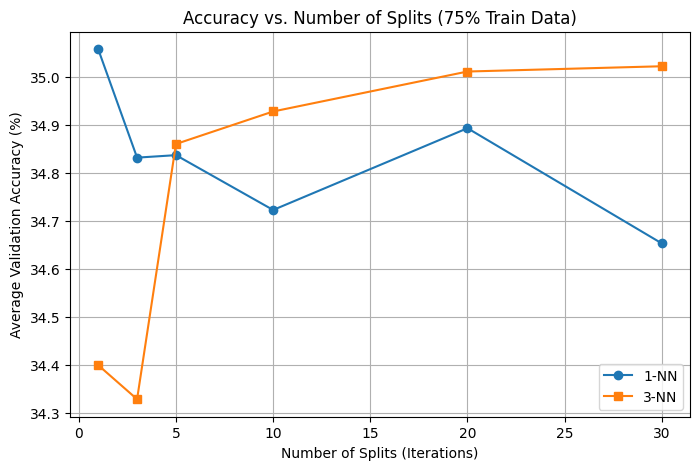

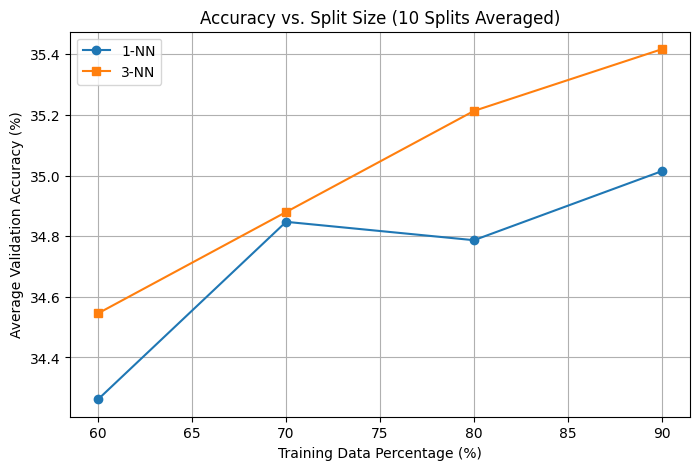

In [26]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load California Housing dataset
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target.astype(int)

# Function to compute average validation accuracy across multiple random splits
def average_validation_accuracy(X, y, splitpercent=0.75, iterations=10, k=3):
    acc_list = []
    for i in range(iterations):
        X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=splitpercent)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        acc_list.append(accuracy_score(y_val, y_pred))
    return np.mean(acc_list)

# Define number of splits (iterations) and split sizes
num_splits = [1, 3, 5, 10, 20, 30]
split_sizes = [0.6, 0.7, 0.8, 0.9]

# Compare 1-NN vs 3-NN across different numbers of splits for one split size
splitpercent = 0.75
acc_1nn = [average_validation_accuracy(X, y, splitpercent, i, k=1) for i in num_splits]
acc_3nn = [average_validation_accuracy(X, y, splitpercent, i, k=3) for i in num_splits]

# Plot accuracy vs. number of splits
plt.figure(figsize=(8,5))
plt.plot(num_splits, np.array(acc_1nn)*100, marker='o', label='1-NN')
plt.plot(num_splits, np.array(acc_3nn)*100, marker='s', label='3-NN')
plt.title("Accuracy vs. Number of Splits (75% Train Data)")
plt.xlabel("Number of Splits (Iterations)")
plt.ylabel("Average Validation Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

# Compare 1-NN vs 3-NN across different split sizes
acc_1nn_size = [average_validation_accuracy(X, y, s, 10, k=1) for s in split_sizes]
acc_3nn_size = [average_validation_accuracy(X, y, s, 10, k=3) for s in split_sizes]

# Plot accuracy vs. split size
plt.figure(figsize=(8,5))
plt.plot(np.array(split_sizes)*100, np.array(acc_1nn_size)*100, marker='o', label='1-NN')
plt.plot(np.array(split_sizes)*100, np.array(acc_3nn_size)*100, marker='s', label='3-NN')
plt.title("Accuracy vs. Split Size (10 Splits Averaged)")
plt.xlabel("Training Data Percentage (%)")
plt.ylabel("Average Validation Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()
